**Historia**

- Antes de que se genere el avance en cómputo paralelo uno de los principales problemas de los algoritmos de segmentación fue el volúmen de datos (large data).
- En ese contexto surge el algoritmo CLARANS
- CLARANS: particionamiento basado en medoides (medianas), por lo que podrías inclir variables discretas. CLARANS en su generalización de PAM (Particionamiento al rededor de medoides).
- CLARANS trabajaba con una muestra de la matriz de disimilaridad (matriz de distancia).

In [ ]:
pip install pyclustering

In [ ]:
pip install pyreadstat

In [1]:
from pyclustering.cluster.clarans import clarans
from pyclustering.utils import timedcall
import numpy as np
import pyreadstat

In [2]:
pathsav="D:/Python/2. Nivel II/4/datos/distritos.sav"

In [3]:
data, meta=pyreadstat.read_sav(pathsav)

In [4]:
meta

In [5]:
data.head()

,distrito,ocu_vivi,pobpjov,sinelect,sinagua,pea1619,pocprin,peam15
0,Ate,1.15,5.3,27.60,51.10,3.9,1.1,63.48
1,Barranco,1.09,4.5,1.59,8.32,0.8,3.9,33.48
2,Breña,1.08,4.4,2.20,23.15,0.9,4.0,37.89
3,Carabayllo,1.10,5.1,30.13,38.09,4.5,12.6,63.65
4,Comas,1.20,5.9,10.92,24.27,3.8,9.4,60.37


In [6]:
xs=data.iloc[:,1:].values

In [7]:
xs[:3]

array([[ 1.15,  5.3 , 27.6 , 51.1 ,  3.9 ,  1.1 , 63.48],
       [ 1.09,  4.5 ,  1.59,  8.32,  0.8 ,  3.9 , 33.48],
       [ 1.08,  4.4 ,  2.2 , 23.15,  0.9 ,  4.  , 37.89]])

**Escalamiento**

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
minmax=MinMaxScaler()

In [10]:
X= minmax.fit_transform(xs)

In [11]:
X[:3]

array([[0.4       , 0.57142857, 0.8364027 , 0.7504256 , 0.71698113,
        0.        , 0.9670574 ],
       [0.2       , 0.28571429, 0.03806016, 0.02213143, 0.13207547,
        0.21052632, 0.36075182],
       [0.16666667, 0.25      , 0.0567833 , 0.27459993, 0.1509434 ,
        0.21804511, 0.44987874]])

In [12]:
clarans_instance = clarans(X,
                          3,
                          10,
                          6)

**Large data: datos de mayor volúmen**

In [13]:
#np.random.seed(2022)
(ticks, result)=timedcall(clarans_instance.process)

In [14]:
ticks

6.259788000000299

In [17]:
result

In [15]:
clusters=clarans_instance.get_clusters()

In [16]:
print(clusters)

[[22, 29, 31, 32], [0, 3, 4, 5, 6, 7, 12, 13, 20, 21, 23, 25, 28, 30], [1, 2, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 24, 26, 27, 33]]


In [21]:
clarans_instance.get_clusters()[2]

[1, 2, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 24, 26, 27, 33]

In [22]:
import pandas as pd
df_x= pd.DataFrame({},
                  columns=[])

In [23]:
df_x

""


In [24]:
type(df_x)

pandas.core.frame.DataFrame

In [25]:
len(clusters)

3

In [26]:
for i in range(0,len(clusters)):
    dfb=data.loc[clusters[i],]
    dfb["cluster"]=i +1
    df_x = pd.concat([df_x,dfb])

In [27]:
df_x.head(n=20)

,distrito,ocu_vivi,pobpjov,sinelect,sinagua,pea1619,pocprin,peam15,cluster
22,San Luis,1.10,5.5,3.94,12.36,1.70,7.0,38.61,1
29,Villa María del Triunfo,1.18,5.6,1.79,9.30,2.20,4.6,38.72,1
31,Carmen de la Legua,1.33,6.5,2.73,7.02,4.02,8.7,60.97,1
32,La Perla,1.17,5.3,1.99,9.12,1.50,3.9,38.10,1
0,Ate,1.15,5.3,27.60,51.10,3.90,1.1,63.48,2
3,Carabayllo,1.10,5.1,30.13,38.09,4.50,12.6,63.65,2
4,Comas,1.20,5.9,10.92,24.27,3.80,9.4,60.37,2
5,Chorrillos,1.15,5.5,16.77,37.11,3.20,10.6,18.78,2
6,Agustino,1.22,6.0,16.42,41.16,4.50,13.5,55.84,2
7,Independencia,1.19,5.9,9.61,21.58,4.00,10.5,60.16,2


In [28]:
df_x.sort_index()

,distrito,ocu_vivi,pobpjov,sinelect,sinagua,pea1619,pocprin,peam15,cluster
0,Ate,1.15,5.3,27.60,51.10,3.90,1.1,63.48,2
1,Barranco,1.09,4.5,1.59,8.32,0.80,3.9,33.48,3
2,Breña,1.08,4.4,2.20,23.15,0.90,4.0,37.89,3
3,Carabayllo,1.10,5.1,30.13,38.09,4.50,12.6,63.65,2
4,Comas,1.20,5.9,10.92,24.27,3.80,9.4,60.37,2
5,Chorrillos,1.15,5.5,16.77,37.11,3.20,10.6,18.78,2
6,Agustino,1.22,6.0,16.42,41.16,4.50,13.5,55.84,2
7,Independencia,1.19,5.9,9.61,21.58,4.00,10.5,60.16,2
8,Jesús María,1.03,4.2,0.57,14.78,0.30,3.1,23.52,3
9,La Victoria,1.06,4.7,3.09,25.79,1.70,7.8,49.21,3


__________________________

**Clúster jerárquico**

In [29]:
import pandas as pd
import numpy as np

In [30]:
variables = ["X","Y"]
labels = ["ID_0","ID_1","ID_2","ID_3","ID_4"]
np.random.seed(123)
X = np.random.random_sample([5,2])*10

In [31]:
df= pd.DataFrame(X,
                 columns=variables,
                 index=labels)

In [32]:
df.head()

,X,Y
ID_0,6.964692,2.861393
ID_1,2.268515,5.513148
ID_2,7.194690,4.231065
ID_3,9.807642,6.848297
ID_4,4.809319,3.921175


In [33]:
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

**Paso 1: estandarización**

In [34]:
std=StandardScaler()
data_std = std.fit_transform(df)

In [35]:
data_std

array([[ 0.29882088, -1.31711231],
       [-1.55810367,  0.60867913],
       [ 0.38976477, -0.32241188],
       [ 1.42295728,  1.57830886],
       [-0.55343926, -0.5474638 ]])

**Paso 2: construir una matriz de distancia**

In [36]:
df_std = pd.DataFrame(data_std)

In [37]:
pd.DataFrame(squareform(pdist(df_std,
                metric="euclidean")),
            columns=labels,
            index=labels)

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,2.675227,0.998849,3.105986,1.148349
ID_1,2.675227,0.000000,2.158963,3.134790,1.531671
ID_2,0.998849,2.158963,0.000000,2.163383,0.969681
ID_3,3.105986,3.134790,2.163383,0.000000,2.902594
ID_4,1.148349,1.531671,0.969681,2.902594,0.000000


**Paso 3: visualización para fines ilustrativos**

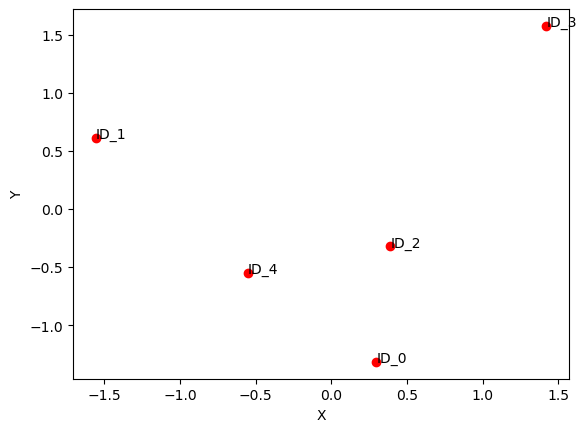

In [38]:
plt.scatter(df_std.iloc[:,0].values, 
            df_std.iloc[:,1].values,
            color="red")
plt.xlabel("X")
plt.ylabel("Y")
for i, label in enumerate(labels):
    plt.annotate(label,(data_std[i][0],data_std[i][1]))

plt.show()

In [39]:
from scipy.cluster.hierarchy import linkage

In [41]:
cluster = linkage(pdist(df_std,metric="euclidean"),
                  method="single")

In [42]:
from scipy.cluster.hierarchy import dendrogram

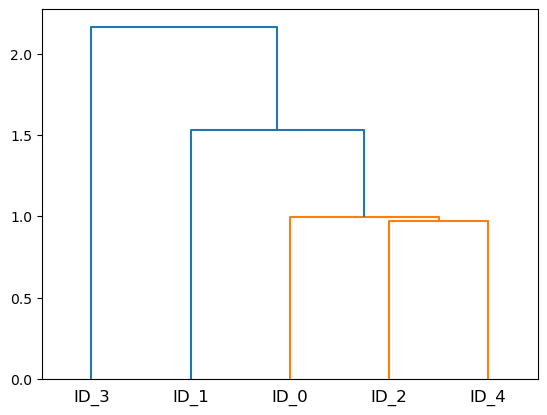

In [43]:
dendograma = dendrogram(cluster,
                        labels=labels)
plt.show()

In [44]:
cluster = linkage(pdist(df_std,metric="euclidean"),
                  method="complete")

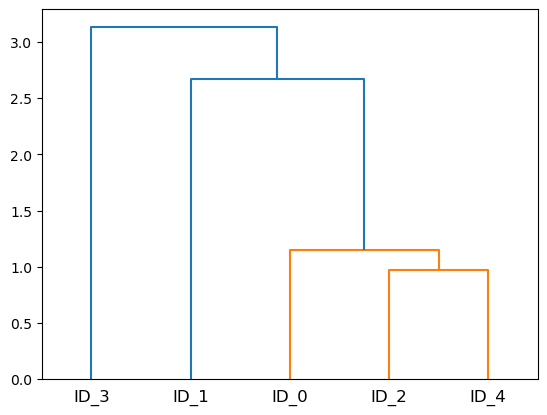

In [45]:
dendograma = dendrogram(cluster, labels=labels)
plt.show()

**Paso 4: agregar a qué clúster pertenece cada una de las observaciones**

**Paso 5: perfilamiento de clúster**

**Clúster jerárquico**

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
agnes = AgglomerativeClustering(n_clusters=2,
                               affinity="euclidean",
                               linkage="single")

In [48]:
df["cluster_AGNES_single"]=agnes.fit_predict(X)+1

In [49]:
df

,X,Y,cluster_AGNES_single
ID_0,6.964692,2.861393,1
ID_1,2.268515,5.513148,1
ID_2,7.194690,4.231065,1
ID_3,9.807642,6.848297,2
ID_4,4.809319,3.921175,1


**Número óptimo de clústers**

In [50]:
from sklearn.metrics import euclidean_distances, silhouette_score

In [51]:
silueta=[]

for i in range(2,5):
    agnes = AgglomerativeClustering(n_clusters=i,
                               affinity="euclidean",
                               linkage="single")
    silueta.append(silhouette_score(X,agnes.fit_predict(X)))

In [52]:
silueta

[0.30758371787876365, 0.2596626119320968, 0.16887394203608858]

In [53]:
k=[2,3,4]

In [54]:
pd.DataFrame({"Silueta":silueta,
              "Número de clusters":k})

,Silueta,Número de clusters
0,0.307584,2
1,0.259663,3
2,0.168874,4


**Nota**: el número óptimo de clústers es 2 (mayor valor en el coef. Silueta)

**Caso:distrito**

In [55]:
import pyreadstat
pathsav="D:/Python/2. Nivel II/4/datos/distritos.sav"
data, meta=pyreadstat.read_sav(pathsav)

In [56]:
data.head()

,distrito,ocu_vivi,pobpjov,sinelect,sinagua,pea1619,pocprin,peam15
0,Ate,1.15,5.3,27.60,51.10,3.9,1.1,63.48
1,Barranco,1.09,4.5,1.59,8.32,0.8,3.9,33.48
2,Breña,1.08,4.4,2.20,23.15,0.9,4.0,37.89
3,Carabayllo,1.10,5.1,30.13,38.09,4.5,12.6,63.65
4,Comas,1.20,5.9,10.92,24.27,3.8,9.4,60.37


In [57]:
X=data.iloc[:,1:].values

**Escalamiento**

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
minmax=MinMaxScaler()

In [60]:
X_scl=minmax.fit_transform(X)

**Análisis clúster**

In [61]:
import scipy.cluster.hierarchy as sch

In [62]:
distritos = list(data["distrito"].values);print(distritos)

['Ate', 'Barranco', 'Breña', 'Carabayllo', 'Comas', 'Chorrillos', 'Agustino', 'Independencia', 'Jesús María', 'La Victoria', 'Lima', 'Lince', 'Los Olivos', 'Lurigancho-Chosica', 'Magdalena del Mar', 'Pueblo Libre', 'Miraflores', 'Rímac', 'San Borja', 'San Isidro', 'San Juan de Lurigancho', 'San Juan de Miraflores', 'San Luis', 'San Martin de Porres', 'San Miguel', 'Santa Anita', 'Surco', 'Surquillo', 'Villa el Salvador', 'Villa María del Triunfo', 'Callao', 'Carmen de la Legua', 'La Perla', 'La Punta']


In [80]:
cluster = linkage(pdist(X_scl,
                        metric="euclidean"),
                 method="complete")

In [81]:
import matplotlib.pyplot as plt

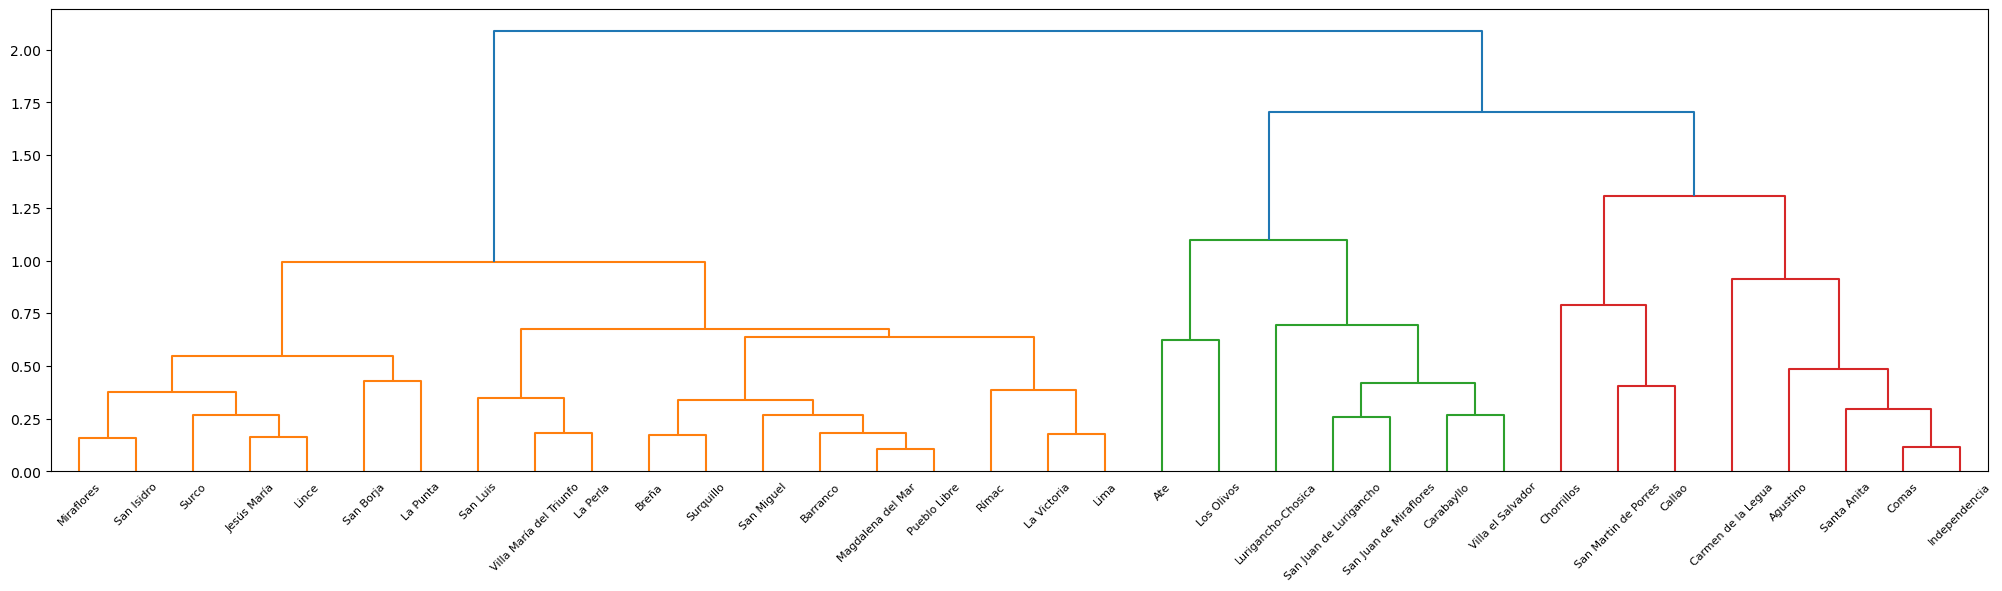

In [82]:
fig, axes= plt.subplots(1,figsize=(25,6))
dendrograma_distritos= dendrogram(cluster,
                                  labels=distritos)
plt.show()

In [83]:
silueta=[]

for i in range(2,11):
    agnes = AgglomerativeClustering(n_clusters=i,
                               affinity="euclidean",
                               linkage="complete")
    silueta.append(silhouette_score(X_scl,
                                    agnes.fit_predict(X_scl)))

In [84]:
k=[2,3,4,5,6,7,8,9,10]

**Coef. Silueta / linkage=Ward**

In [70]:
coef_ward=pd.DataFrame({"Silueta":silueta, "Número de clusters":k})
coef_ward[coef_ward.Silueta==coef_ward.Silueta.max()]

,Silueta,Número de clusters
0,0.486332,2


**Coef. Silueta / linkage=Simple**

In [73]:
coef_simple=pd.DataFrame({"Silueta":silueta, "Número de clusters":k})
coef_simple[coef_simple.Silueta==coef_simple.Silueta.max()]

,Silueta,Número de clusters
5,0.318628,7


**Coef. Silueta / linkage=Completo**

In [85]:
coef_completo=pd.DataFrame({"Silueta":silueta, "Número de clusters":k})
coef_completo[coef_completo.Silueta==coef_completo.Silueta.max()]

,Silueta,Número de clusters
0,0.491727,2


**Modelo**

In [86]:
agnes = AgglomerativeClustering(n_clusters=2,
                               affinity="euclidean",
                               linkage="complete")

In [87]:
data["Cluster_AGNES"]=agnes.fit_predict(X_scl)+1

In [88]:
data.head()

,distrito,ocu_vivi,pobpjov,sinelect,sinagua,pea1619,pocprin,peam15,Cluster_AGNES
0,Ate,1.15,5.3,27.60,51.10,3.9,1.1,63.48,1
1,Barranco,1.09,4.5,1.59,8.32,0.8,3.9,33.48,2
2,Breña,1.08,4.4,2.20,23.15,0.9,4.0,37.89,2
3,Carabayllo,1.10,5.1,30.13,38.09,4.5,12.6,63.65,1
4,Comas,1.20,5.9,10.92,24.27,3.8,9.4,60.37,1


**Perfilamiento**

In [89]:
data.groupby(["Cluster_AGNES"]).mean().round(1)

,ocu_vivi,pobpjov,sinelect,sinagua,pea1619,pocprin,peam15
Cluster_AGNES,,,,,,,
1,1.2,5.5,18.9,37.0,3.8,9.8,56.8
2,1.1,4.6,2.4,15.8,0.9,5.1,32.2


**Visualización usando 2 dimensiones**

**Nota**: el PCA se utiliza como técnica de reducción para visualización de datos

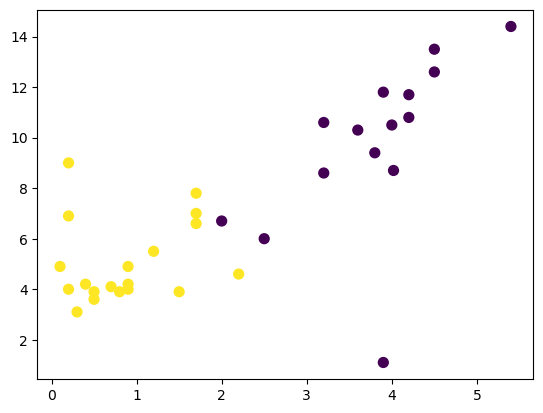

In [90]:
plt.scatter(data.iloc[:,5].values,
           data.iloc[:,6].values,
           s=50,
           c=data["Cluster_AGNES"].values)
plt.show()